In [1]:
import cv2
import numpy as np
from IPython.display import Image

In [2]:
# 최소 정확도.
Min_confidence = .95

# Loading Yolo model. 
Net = cv2.dnn.readNet('opencv_data/yolo/yolov3.weights', 'opencv_data/yolo/yolov3.cfg')

# 사물 종류를 리스트로 추출.
with open('opencv_data/yolo/coco.names', 'r') as fp:
    classes =[line.strip() for line in fp.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
# 은닉층의 이름들을 추출.
layer_names = Net.getLayerNames()

# 다수의 신경망을 사용하는 yolo 모델에서 각 신경망의 출력층 이름을 가져옴.
output_layers = [layer_names[i[0] - 1] for i in Net.getUnconnectedOutLayers() ]

# 각 사물에 대하여 표시할 영역의 색상을 랜덤하게 설정.
colors = np.random.uniform(0, 255, size=(len(classes), 3))
# print(colors)

# 이미지 읽기.
img = cv2.imread('opencv_data/image/yolo_01.jpg')
#img = cv2.imread('opencv_data/image/marathon_03.jpg')

# 이미지 정보.
Height, Width, Chennels = img.shape

# 이미지 크기 조정 후 2진 데이터화
# 320 x 320, 416 x 416, 609 x 609
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

# 2진 데이터를 넣어 예측 결과 추출.
Net.setInput(blob)
outs = Net.forward(output_layers)

# 예측된 결과를 담을 리스트.
# 인지된 사물의 인덱스 번호.
class_idx = []

# 예측 정확도.
confidences = []

# 인지된 사물의 영역.
Boxes = []

# import collections

# 각 신경망이 예측한 결과 묶음의 개수(3개) 만큼 바복.
# print(len(outs[0][0]))
for out in outs :
    # print(out)
    # 예측된 사물의 수 만큼 반복.
    for detection in out :
        # 예측 정확도를 가지고 있는 배열을 추출.
        scores = detection[5:]
        # 가장 높은 정확도를 가지고 있는 곳의 인덱스를 추출.
        class_id = np.argmax(scores)
        
        # 거의 다 0으로 인지 => 잘 인식을 못한게 보임.
        # print(class_id)
        # print(collections.Counter(scores))
        
        # 예측 정확도를 가져옴.
        Confidence = scores[class_id]
        # print(Confidence)
        
        # 예측 정확도가 설정한 최소 정확도 보다 큰 것만 사용.
        if Confidence > Min_confidence :
            
            # 감지한 사물의 영역을 표시.
            # 사물의 중앙점 x, y 좌표.
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)

            # 사물의 가로 세로 길이
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)

            # 영역의 x, y 좌표.
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            # print(x, y, w, h)

            # 표현.
            cv2.rectangle(img, (x,y), (x+w, y+h), colors[class_id], 2)    
            
            # 물체 이름을 표시.
            text = f'{classes[class_id]} : {int(Confidence*100)}%'
            cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_PLAIN, 1, colors[class_id], 1)
            
            # 검출된 항목의 인덱스를 담음.
            class_idx.append(class_id)
            
            # 검출된 항목의 예측 정확도를 담는다.
            confidences.append(Confidence)
            
            # 인지된 사물의 영역을 담는다.
            Boxes.append((x,y,w,h))

cv2.imshow("Yolo image", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# 결과 출력.
for idx in range(len(class_idx)):
    a1 = classes[class_idx[idx]]
    a2 = confidences[idx]
    a3 = Boxes[idx]
    
    print(f'이름 : {a1}')
    print(f'정확도 : {a2}%')
    print(f'영역 : {a3}')
    print('-'*50)

이름 : car
정확도 : 0.9808712005615234%
영역 : (6, 364, 223, 115)
--------------------------------------------------
이름 : car
정확도 : 0.969380259513855%
영역 : (329, 378, 203, 128)
--------------------------------------------------
이름 : car
정확도 : 0.9711914658546448%
영역 : (8, 361, 217, 121)
--------------------------------------------------
이름 : car
정확도 : 0.9755211472511292%
영역 : (516, 386, 82, 68)
--------------------------------------------------
이름 : person
정확도 : 0.9571173191070557%
영역 : (860, 369, 43, 112)
--------------------------------------------------
이름 : person
정확도 : 0.9603180289268494%
영역 : (926, 376, 45, 96)
--------------------------------------------------
이름 : car
정확도 : 0.9945846796035767%
영역 : (340, 388, 187, 108)
--------------------------------------------------
이름 : car
정확도 : 0.9956751465797424%
영역 : (342, 374, 184, 136)
--------------------------------------------------
이름 : person
정확도 : 0.9896934628486633%
영역 : (580, 380, 73, 127)
---------------------------------------------

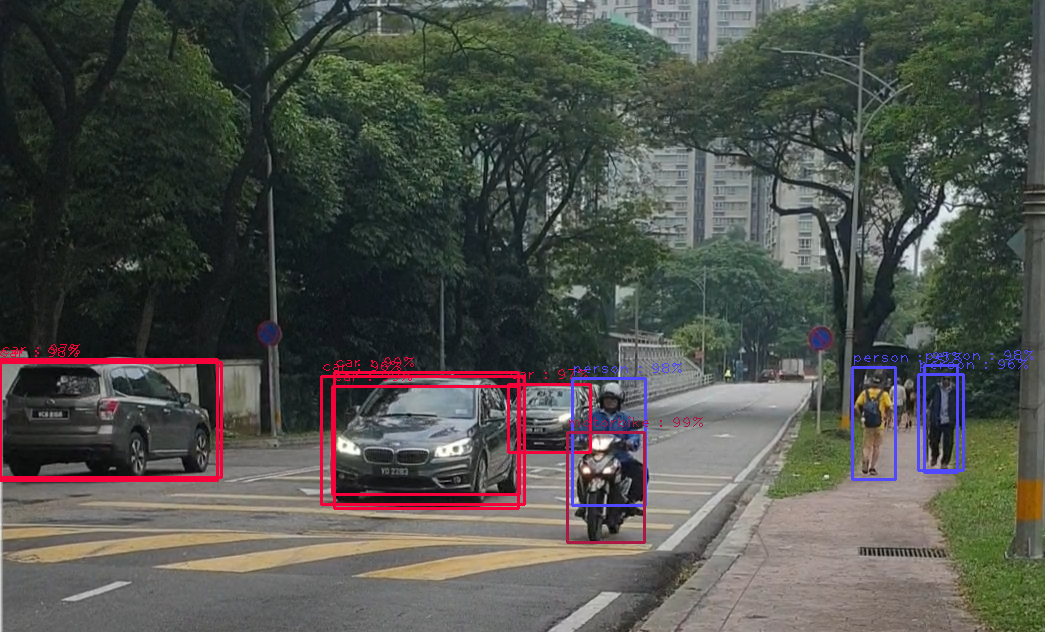

In [5]:
Image('opencv_image/21.1.PNG')

In [6]:
# 영상 읽기.
cap = cv2.VideoCapture('opencv_data/video/yolo_01.mp4')

while True :
    ret, frame = cap.read()
    if frame is None :
        break
        
    # 인식.
    # 영상 정보.
    Height, Width = frame.shape[:2]
    
    # 프레임 크기 조정 후 2진 데이터화
    # 320 x 320, 416 x 416, 609 x 609
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416,416), (0,0,0), True, crop=False)

    # 2진 데이터를 넣어 예측 결과 추출.
    Net.setInput(blob)
    outs = Net.forward(output_layers)

    # 각 신경망이 예측한 결과 묶음의 개수(3개) 만큼 바복.
    # print(len(outs[0][0]))
    for out in outs :
        # print(out)
        # 예측된 사물의 수 만큼 반복.
        for detection in out :
            # 예측 정확도를 가지고 있는 배열을 추출.
            scores = detection[5:]
            # 가장 높은 정확도를 가지고 있는 곳의 인덱스를 추출.
            class_id = np.argmax(scores)

            # 거의 다 0으로 인지 => 잘 인식을 못한게 보임.
            # print(class_id)
            # print(collections.Counter(scores))

            # 예측 정확도를 가져옴.
            Confidence = scores[class_id]
            # print(Confidence)

            # 예측 정확도가 설정한 최소 정확도 보다 큰 것만 사용.
            if Confidence > Min_confidence :

                # 감지한 사물의 영역을 표시.
                # 사물의 중앙점 x, y 좌표.
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)

                # 사물의 가로 세로 길이
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)

                # 영역의 x, y 좌표.
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                # print(x, y, w, h)

                # 표현.
                cv2.rectangle(frame, (x,y), (x+w, y+h), colors[class_id], 2)    

                # 물체 이름을 표시.
                text = f'{classes[class_id]} : {int(Confidence*100)}%'
                cv2.putText(frame, text, (x, y-5), cv2.FONT_HERSHEY_PLAIN, 1, colors[class_id], 1)
    
    # 영역을 그림.
    cv2.imshow('Vedio', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
    
cv2.destroyAllWindows()

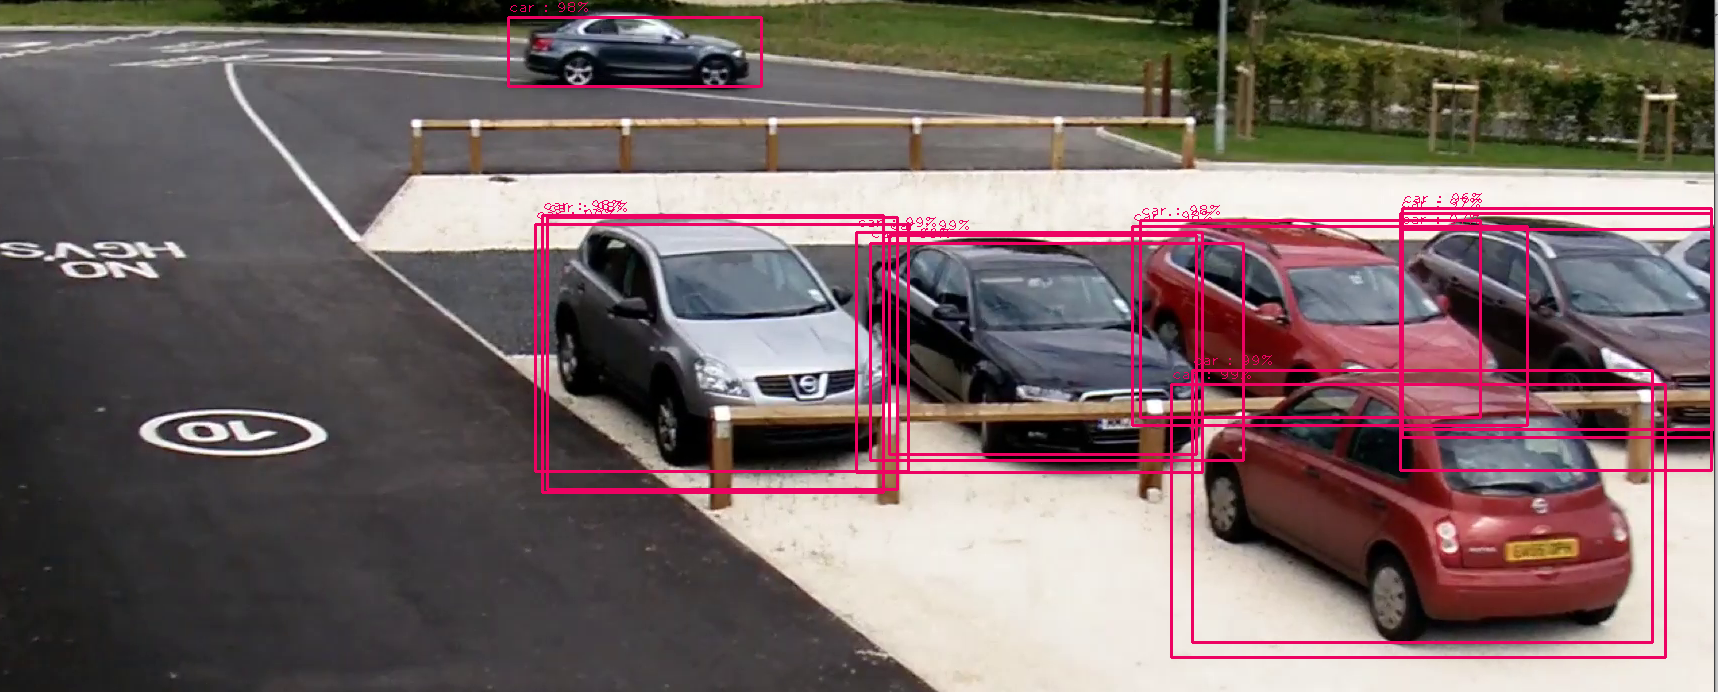

In [7]:
# 영상 캡처 이미지.
Image('opencv_image/ss.PNG')